In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import shap
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
df = pd.read_csv("StudentPerformanceFactors.csv")
pd.set_option('display.max_columns', None)
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


# Viewing All the unique values present in all the columns

In [7]:
for col in df.columns:
    print(col, '\n', df[col].unique())

Hours_Studied 
 [23 19 24 29 25 17 21  9 10 14 22 15 12 20 11 13 16 18 31  8 26 28  4 35
 27 33 36 43 34  1 30  7 32  6 38  5  3  2 39 37 44]
Attendance 
 [ 84  64  98  89  92  88  78  94  80  97  83  82  68  60  70  75  99  74
  65  62  91  90  66  69  72  63  61  86  77  71  67  87  73  96 100  81
  95  79  85  76  93]
Parental_Involvement 
 ['Low' 'Medium' 'High']
Access_to_Resources 
 ['High' 'Medium' 'Low']
Extracurricular_Activities 
 ['No' 'Yes']
Sleep_Hours 
 [ 7  8  6 10  9  5  4]
Previous_Scores 
 [ 73  59  91  98  65  89  68  50  80  71  88  87  97  72  74  70  82  58
  99  84 100  75  54  90  94  51  57  66  96  93  56  52  63  79  81  69
  95  60  92  77  62  85  78  64  76  55  86  61  53  83  67]
Motivation_Level 
 ['Low' 'Medium' 'High']
Internet_Access 
 ['Yes' 'No']
Tutoring_Sessions 
 [0 2 1 3 4 5 6 7 8]
Family_Income 
 ['Low' 'Medium' 'High']
Teacher_Quality 
 ['Medium' 'High' 'Low' nan]
School_Type 
 ['Public' 'Private']
Peer_Influence 
 ['Positive' 'Negative' 'Neu

# Checking the occurence of each variable in each column

In [10]:
for col in df.columns:
    print(col, '\n', df[col].value_counts())

Hours_Studied 
 Hours_Studied
20    465
19    441
21    431
23    411
22    402
18    401
17    381
24    357
16    351
15    315
25    289
14    269
26    263
27    229
13    218
12    192
28    171
11    146
29    134
30    123
10     94
9      86
31     77
8      58
32     54
7      51
33     40
34     29
5      21
35     20
6      17
4      17
3      12
36     11
38      7
39      7
37      6
2       6
1       3
43      1
44      1
Name: count, dtype: int64
Attendance 
 Attendance
67     190
98     187
76     185
77     184
64     182
94     180
84     175
79     175
91     175
82     173
68     170
69     170
80     169
81     168
96     168
73     168
93     167
72     167
74     165
78     165
61     164
95     163
89     162
71     162
97     161
70     161
65     158
83     157
90     156
88     155
63     155
99     154
92     154
62     152
86     151
87     151
75     149
85     146
66     145
60      87
100     81
Name: count, dtype: int64
Parental_Involvement 
 Parental_I

# Checking for Nulls

In [13]:
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [15]:
df
df["Distance_from_Home"].unique()

array(['Near', 'Moderate', 'Far', nan], dtype=object)

# Updating the categorical values with integer values where possible; example: Low, Medium, High is mapped to 0, 1, 2

In [18]:
df_copy = df.copy()
df_copy["Parental_Involvement"] = df_copy["Parental_Involvement"].map({'Low': 0, 'Medium': 1, 'High': 2})
df_copy["Access_to_Resources"] = df_copy["Access_to_Resources"].map({'Low': 0, 'Medium': 1, 'High': 2})
df_copy["Motivation_Level"] = df_copy["Motivation_Level"].map({'Low': 0, 'Medium': 1, 'High': 2})
df_copy["Family_Income"] = df_copy["Family_Income"].map({'Low': 0, 'Medium': 1, 'High': 2})
df_copy["Teacher_Quality"] = df_copy["Teacher_Quality"].map({'Low': 0, 'Medium': 1, 'High': 2})
df_copy["Peer_Influence"] = df_copy["Peer_Influence"].map({'Positive': 1, 'Negative': -1, 'Neutral': 0})
df_copy["Distance_from_Home"] = df_copy["Distance_from_Home"].map({'Near': 0, 'Moderate': 1, 'Far': 2})

df_copy

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,0,2,No,7,73,0,Yes,0,0,1.0,Public,1,3,No,High School,0.0,Male,67
1,19,64,0,1,No,8,59,0,Yes,2,1,1.0,Public,-1,4,No,College,1.0,Female,61
2,24,98,1,1,Yes,7,91,1,Yes,2,1,1.0,Public,0,4,No,Postgraduate,0.0,Male,74
3,29,89,0,1,Yes,8,98,1,Yes,1,1,1.0,Public,-1,4,No,High School,1.0,Male,71
4,19,92,1,1,Yes,6,65,1,Yes,3,1,2.0,Public,0,4,No,College,0.0,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,2,1,No,7,76,1,Yes,1,2,1.0,Public,1,2,No,High School,0.0,Female,68
6603,23,76,2,1,No,8,81,1,Yes,3,0,2.0,Public,1,2,No,High School,0.0,Female,69
6604,20,90,1,0,Yes,6,65,0,Yes,3,0,1.0,Public,-1,2,No,Postgraduate,0.0,Female,68
6605,10,86,2,2,Yes,6,91,2,Yes,2,0,1.0,Private,1,3,No,High School,2.0,Female,68


# Imputing Nulls with Continuous Columns with Median and Categorical Columns with Mode

In [21]:
df_copy["Teacher_Quality"] = np.where( 
    df_copy["Teacher_Quality"].isnull(), 
    df_copy["Teacher_Quality"].median(),
    df_copy["Teacher_Quality"]
)

df_copy["Distance_from_Home"] = np.where( 
    df_copy["Distance_from_Home"].isnull(), 
    df_copy["Distance_from_Home"].median(),
    df_copy["Distance_from_Home"]
)

df_copy["Parental_Education_Level"] = np.where( 
    df_copy["Parental_Education_Level"].isnull(), 
    df_copy["Parental_Education_Level"].mode(),
    df_copy["Parental_Education_Level"]
)

# One Hot Encoding the remaining Categorical Columns

In [24]:
EA_dummies = pd.get_dummies(df_copy['Extracurricular_Activities'])
EA_dummies.rename(columns = {'No' : 'No_Extracurricular_Activities', 'Yes' : 'Yes_Extracurricular_Activities'}, inplace = True)
print(EA_dummies.head())

IA_dummies = pd.get_dummies(df_copy['Internet_Access'])
IA_dummies.rename(columns = {'No' : 'No_Internet_Access', 'Yes' : 'Yes_Internet_Access'}, inplace = True)
print(IA_dummies.head())

ST_dummies = pd.get_dummies(df_copy['School_Type'])
print(ST_dummies.head())

LD_dummies = pd.get_dummies(df_copy['Learning_Disabilities'])
LD_dummies.rename(columns = {'No' : 'No_Learning_Disabilities', 'Yes' : 'Yes_Learning_Disabilities'}, inplace = True)
print(LD_dummies.head())

PEL_dummies = pd.get_dummies(df_copy['Parental_Education_Level'])
print(PEL_dummies.head())

Gender_dummies = pd.get_dummies(df_copy['Gender'])
print(Gender_dummies.head())

   No_Extracurricular_Activities  Yes_Extracurricular_Activities
0                           True                           False
1                           True                           False
2                          False                            True
3                          False                            True
4                          False                            True
   No_Internet_Access  Yes_Internet_Access
0               False                 True
1               False                 True
2               False                 True
3               False                 True
4               False                 True
   Private  Public
0    False    True
1    False    True
2    False    True
3    False    True
4    False    True
   No_Learning_Disabilities  Yes_Learning_Disabilities
0                      True                      False
1                      True                      False
2                      True                      False
3                 

# Merging the One Hot Encoded Columns together

In [27]:
df_copy = pd.concat([df_copy, EA_dummies], axis = 1)
df_copy = pd.concat([df_copy, IA_dummies], axis = 1)
df_copy = pd.concat([df_copy, ST_dummies], axis = 1)
df_copy = pd.concat([df_copy, LD_dummies], axis = 1)
df_copy = pd.concat([df_copy, PEL_dummies], axis = 1)
df_copy = pd.concat([df_copy, Gender_dummies], axis = 1)
df_copy.drop(columns = ['Extracurricular_Activities', 'Internet_Access', 'School_Type', 'Learning_Disabilities', 'Parental_Education_Level', 'Gender'], inplace = True)

# Checking Correlation Heatmap: This will help us identify any highly Correlated Features for further analysis

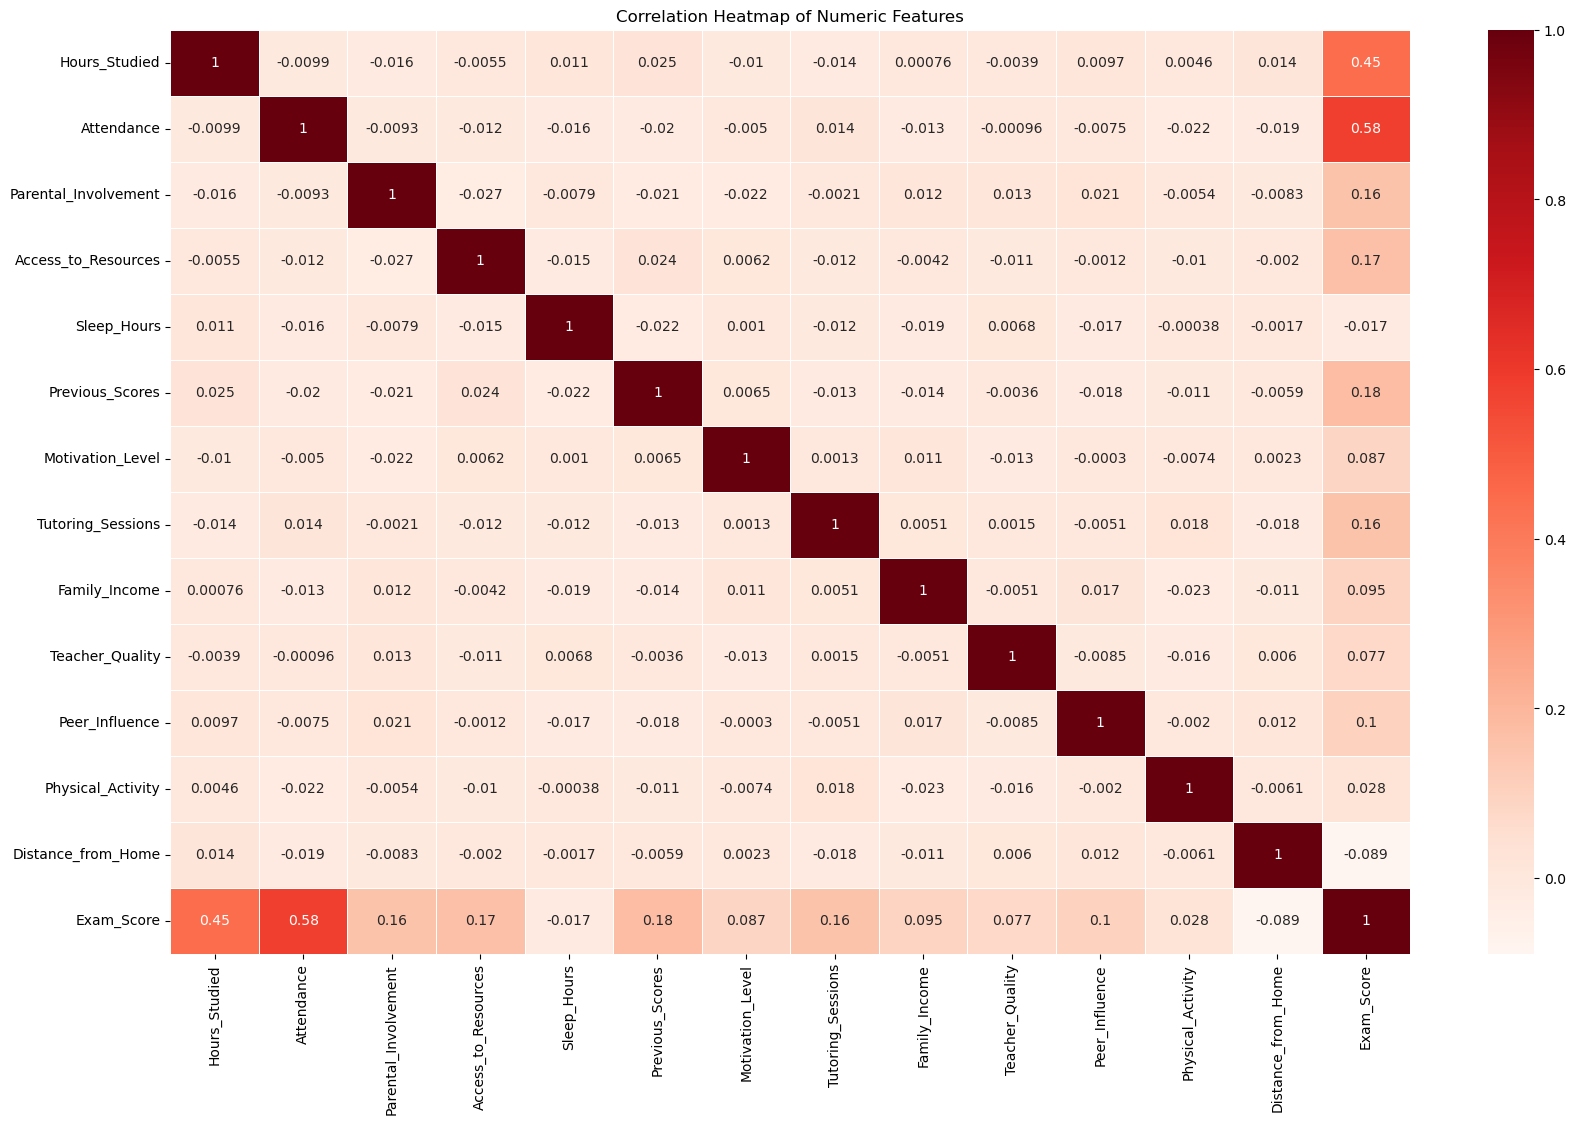

In [30]:
df_copy

df_copy_numeric = df_copy.select_dtypes(include = [np.number])
correlation_matrix = df_copy_numeric.corr()

plt.figure(figsize = (20, 12))
sns.heatmap(correlation_matrix, annot = True, cmap = 'Reds', linewidths = 0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

In [32]:
df_copy = df_copy * 1
df_copy

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Sleep_Hours,Previous_Scores,Motivation_Level,Tutoring_Sessions,Family_Income,Teacher_Quality,Peer_Influence,Physical_Activity,Distance_from_Home,Exam_Score,No_Extracurricular_Activities,Yes_Extracurricular_Activities,No_Internet_Access,Yes_Internet_Access,Private,Public,No_Learning_Disabilities,Yes_Learning_Disabilities,College,High School,Postgraduate,Female,Male
0,23,84,0,2,7,73,0,0,0,1.0,1,3,0.0,67,1,0,0,1,0,1,1,0,0,1,0,0,1
1,19,64,0,1,8,59,0,2,1,1.0,-1,4,1.0,61,1,0,0,1,0,1,1,0,1,0,0,1,0
2,24,98,1,1,7,91,1,2,1,1.0,0,4,0.0,74,0,1,0,1,0,1,1,0,0,0,1,0,1
3,29,89,0,1,8,98,1,1,1,1.0,-1,4,1.0,71,0,1,0,1,0,1,1,0,0,1,0,0,1
4,19,92,1,1,6,65,1,3,1,2.0,0,4,0.0,70,0,1,0,1,0,1,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,2,1,7,76,1,1,2,1.0,1,2,0.0,68,1,0,0,1,0,1,1,0,0,1,0,1,0
6603,23,76,2,1,8,81,1,3,0,2.0,1,2,0.0,69,1,0,0,1,0,1,1,0,0,1,0,1,0
6604,20,90,1,0,6,65,0,3,0,1.0,-1,2,0.0,68,0,1,0,1,0,1,1,0,0,0,1,1,0
6605,10,86,2,2,6,91,2,2,0,1.0,1,3,2.0,68,0,1,0,1,1,0,1,0,0,1,0,1,0


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Spliting the Training and Testing Datasets, and Standardizing the Values

In [37]:
X = df_copy.drop(columns = ['Exam_Score'])
y = df_copy[['Exam_Score']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.reset_index(drop = True, inplace = True)
X_test.reset_index(drop = True, inplace = True)
y_train.reset_index(drop = True, inplace = True)
y_test.reset_index(drop = True, inplace = True)

X_train_numerical = X_train.loc[:, 'Hours_Studied' : 'Distance_from_Home']
X_train_categorical = X_train.loc[:, 'No_Extracurricular_Activities' : ]

X_test_numerical = X_test.loc[:, 'Hours_Studied' : 'Distance_from_Home']
X_test_categorical = X_test.loc[:, 'No_Extracurricular_Activities' : ]

x_standardizer = StandardScaler()
y_standardizer = StandardScaler()

X_train_numerical_Scaled = pd.DataFrame(x_standardizer.fit_transform(X_train_numerical), columns = X_train_numerical.columns)
X_test_numerical_Scaled = pd.DataFrame(x_standardizer.transform(X_test_numerical), columns = X_test_numerical.columns)

y_train_scaled = pd.DataFrame(y_standardizer.fit_transform(y_train), columns = y_train.columns)
y_test_scaled = pd.DataFrame(y_standardizer.transform(y_test), columns = y_test.columns)

X_train_scaled = pd.concat([X_train_numerical_Scaled, X_train_categorical], axis = 1)
X_test_scaled = pd.concat([X_test_numerical_Scaled, X_test_categorical], axis = 1)

# Linear Regression

In [40]:
Linear_Regression_Model = LinearRegression()

In [42]:
Linear_Regression_Model.fit(X_train_scaled, y_train)

LinearRegression()

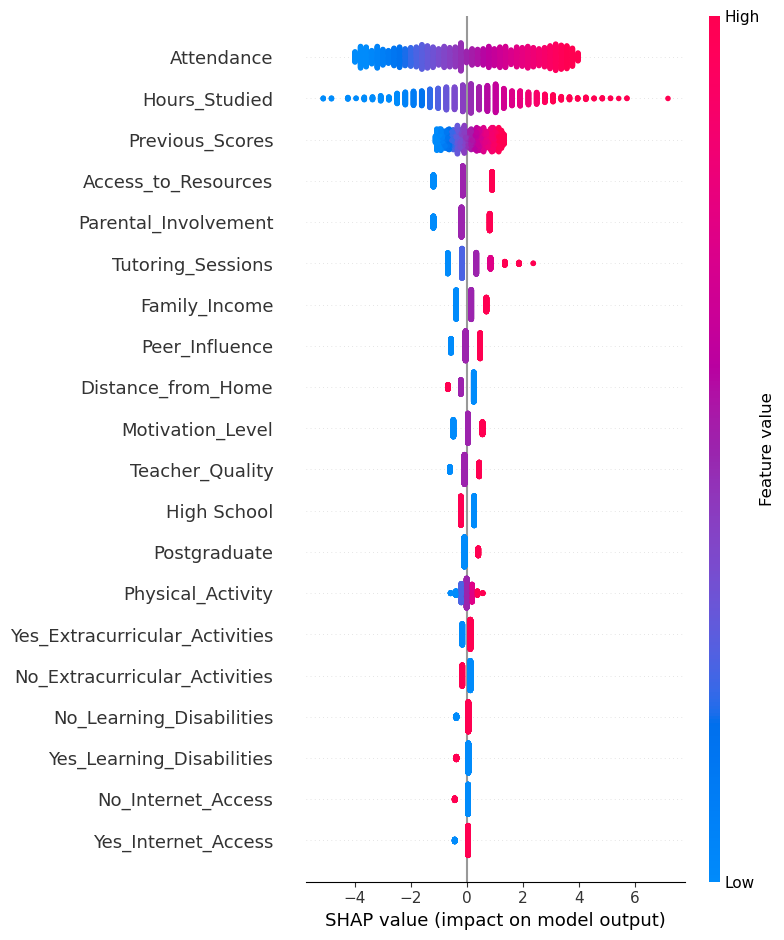

In [58]:
# SHAP for Linear Regression
explainer = shap.LinearExplainer(Linear_Regression_Model, X_train_scaled)
shap_values = explainer.shap_values(X_test_scaled)
shap.summary_plot(shap_values, X_test_scaled, feature_names=X_test_scaled.columns)

In [62]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], X_test_scaled.iloc[0], feature_names=X_test_scaled.columns)

In [64]:
y_LR_predict = Linear_Regression_Model.predict(X_test_scaled)
y_LR_predict

array([[64.62427276],
       [65.29335232],
       [71.52848411],
       ...,
       [66.06116641],
       [63.42375388],
       [71.87691977]])

In [66]:
lr_mse = mean_squared_error(y_test, y_LR_predict)
lr_mape = mean_absolute_percentage_error(y_test, y_LR_predict)

print(f"Linear Regression MSE: {lr_mse}")
print(f"Linear Regression MAPE: {lr_mape}")

Linear Regression MSE: 3.2389912152722387
Linear Regression MAPE: 0.006157221447006202


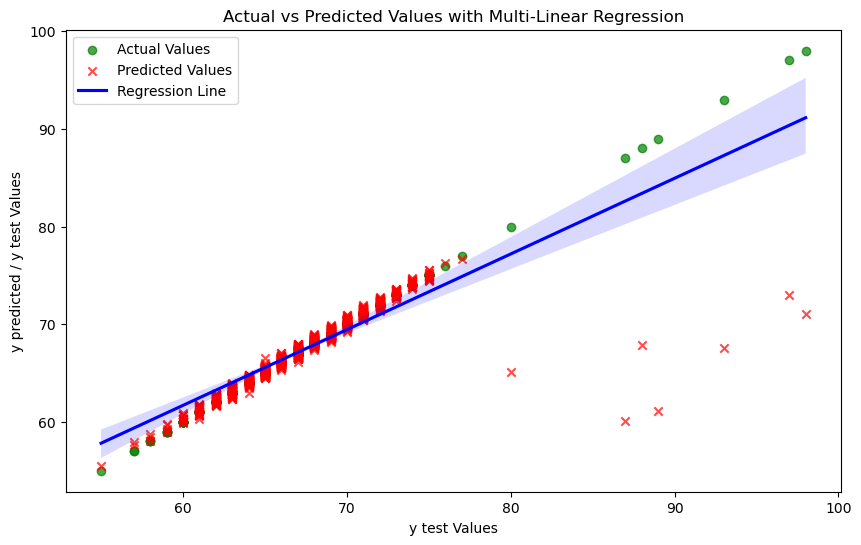

In [68]:
plt.figure(figsize=(10, 6))

# Scatter plot for actual values
plt.scatter(y_test, y_test, color = 'green', alpha = 0.7, label = 'Actual Values', marker = 'o')

# Scatter plot for predicted values
plt.scatter(y_test, y_LR_predict, color = 'red', alpha = 0.7, label = 'Predicted Values', marker = 'x')

# Regression line (fit for predicted values)
sns.regplot(x = y_test, y = y_LR_predict, scatter = False, color = 'blue', label = 'Regression Line')

# Plot enhancements
plt.xlabel('y test Values')
plt.ylabel('y predicted / y test Values')
plt.title('Actual vs Predicted Values with Multi-Linear Regression')
plt.legend()
plt.show()


# Linear Regression Results:

### Linear Regression MSE: 3.2389912152722395
### Linear Regression MAPE: 0.006157221447006197

# Ridge Regression: L2 Regularization

In [87]:
alpha = np.logspace(-2, 2, 10)

In [89]:
Ridge_Model = Ridge()

In [91]:
Ridge_Model_CV = GridSearchCV(Ridge_Model, param_grid = {'alpha' : alpha}, cv = 5, scoring = 'neg_mean_squared_error')

In [93]:
Ridge_Model_CV.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-02, 2.78255940e-02, 7.74263683e-02, 2.15443469e-01,
       5.99484250e-01, 1.66810054e+00, 4.64158883e+00, 1.29154967e+01,
       3.59381366e+01, 1.00000000e+02])},
             scoring='neg_mean_squared_error')

In [95]:
best_alpha_ridge = Ridge_Model_CV.best_params_['alpha']
print(f"Best alpha for Ridge: {best_alpha_ridge}")

Best alpha for Ridge: 12.915496650148826


In [97]:
Ridge_Best_Model = Ridge_Model_CV.best_estimator_

  0%|          | 0/50 [00:00<?, ?it/s]

SHAP Waterfall Plot for Ridge Regression - First Test Instance


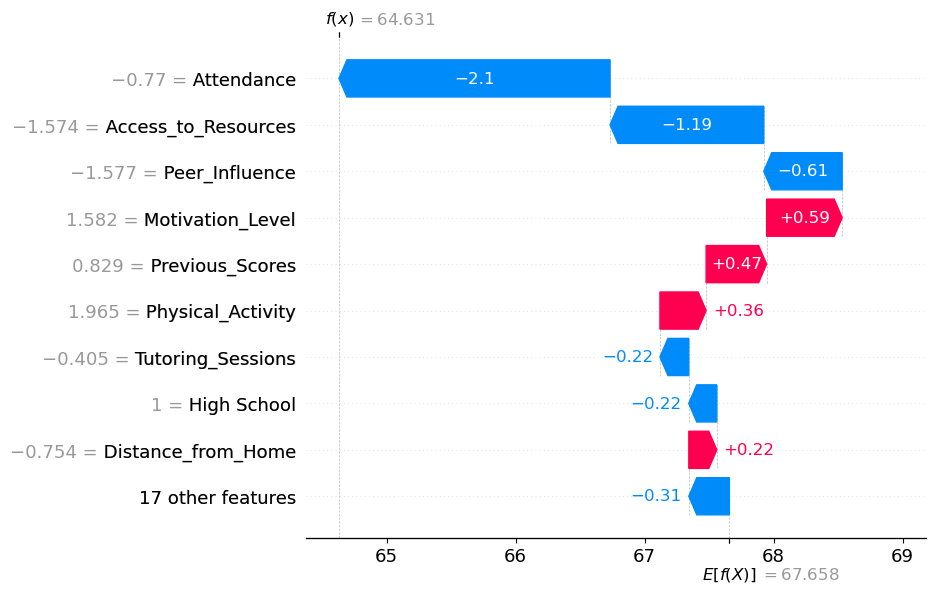

In [124]:
explainer = shap.KernelExplainer(Ridge_Best_Model.predict, X_train_scaled.sample(100))
shap_values = explainer.shap_values(X_test_scaled[:50])
    
# SHAP Waterfall Plot for the First Test Instance
print("SHAP Waterfall Plot for Ridge Regression - First Test Instance")

# Select SHAP values for the first test instance and flatten them
single_shap_value = shap_values[0].flatten()  # Flatten to remove extra dimension

# Handle expected value (scalar or list)
base_value = explainer.expected_value[0] if isinstance(explainer.expected_value, list) else explainer.expected_value

# Create the SHAP Waterfall Plot
shap.waterfall_plot(
    shap.Explanation(
        values=single_shap_value,          # Flattened SHAP values for the first instance
        base_values=base_value,            # Base value for the prediction
        data=X_test_scaled.iloc[0],        # Feature values for first test instance
        feature_names=X_test_scaled.columns.tolist()  # Feature names
    )
)


In [128]:
y_pred_best_ridge = Ridge_Best_Model.predict(X_test_scaled)
y_pred_best_ridge

array([[64.63052304],
       [65.29744505],
       [71.51079534],
       ...,
       [66.06408963],
       [63.42802371],
       [71.86385624]])

In [130]:
ridge_mse = mean_squared_error(y_test, y_pred_best_ridge)
ridge_mape = mean_absolute_percentage_error(y_test, y_pred_best_ridge)

print(f"Ridge Regression MSE: {ridge_mse}")
print(f"Ridge Regression MAPE: {ridge_mape}")

Ridge Regression MSE: 3.2384922277874266
Ridge Regression MAPE: 0.006166123809715783


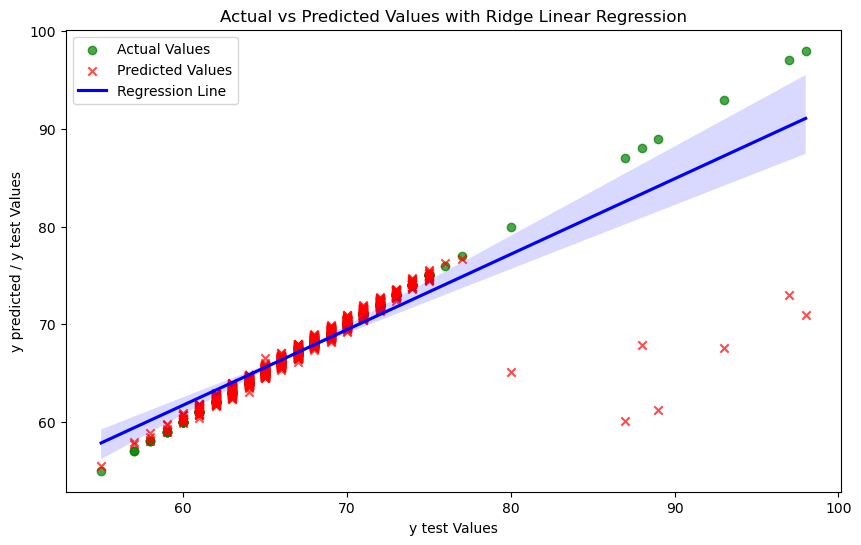

In [132]:
plt.figure(figsize = (10, 6))

# Scatter plot for actual values
plt.scatter(y_test, y_test, color = 'green', alpha = 0.7, label = 'Actual Values', marker = 'o')

# Scatter plot for predicted values
plt.scatter(y_test, y_pred_best_ridge, color = 'red', alpha = 0.7, label = 'Predicted Values', marker = 'x')

# Regression line (fit for predicted values)
sns.regplot(x = y_test, y = y_pred_best_ridge, scatter = False, color = 'blue', label = 'Regression Line')

# Plot enhancements
plt.xlabel('y test Values')
plt.ylabel('y predicted / y test Values')
plt.title('Actual vs Predicted Values with Ridge Linear Regression')
plt.legend()
plt.show()


# Ridge Regression Results: 

### Ridge Regression MSE: 3.2384922277874266### Ridge Regression MAPE: 0.006166123809715788

# Random Forest Model

In [137]:
Random_Forest_Model = RandomForestRegressor(criterion = 'squared_error', min_samples_leaf = 5, min_samples_split = 10, random_state = 42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': range(5, 11),
}

Random_Forest_CV = GridSearchCV(
    Random_Forest_Model,
    param_grid,
    scoring = 'neg_mean_squared_error', 
    cv = 5,
    verbose = 2
)

# Fit the model
Random_Forest_CV.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END .......................max_depth=5, n_estimators=50; total time=   0.3s
[CV] END .......................max_depth=5, n_estimators=50; total time=   0.2s
[CV] END .......................max_depth=5, n_estimators=50; total time=   0.2s
[CV] END .......................max_depth=5, n_estimators=50; total time=   0.2s
[CV] END .......................max_depth=5, n_estimators=50; total time=   0.2s
[CV] END ......................max_depth=5, n_estimators=100; total time=   0.4s
[CV] END ......................max_depth=5, n_estimators=100; total time=   0.4s
[CV] END ......................max_depth=5, n_estimators=100; total time=   0.5s
[CV] END ......................max_depth=5, n_estimators=100; total time=   0.4s
[CV] END ......................max_depth=5, n_estimators=100; total time=   0.5s
[CV] END ......................max_depth=5, n_estimators=200; total time=   1.0s
[CV] END ......................max_depth=5, n_es

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(min_samples_leaf=5,
                                             min_samples_split=10,
                                             random_state=42),
             param_grid={'max_depth': range(5, 11),
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error', verbose=2)

In [139]:
print(f"Best Parameters for Random Forest: {Random_Forest_CV.best_params_}")
print(f"Best Score for Random Forest: {Random_Forest_CV.best_score_}")

Best Parameters for Random Forest: {'max_depth': 10, 'n_estimators': 200}
Best Score for Random Forest: -5.7181265589515915


In [141]:
Random_Forest_Best_Model = Random_Forest_CV.best_estimator_

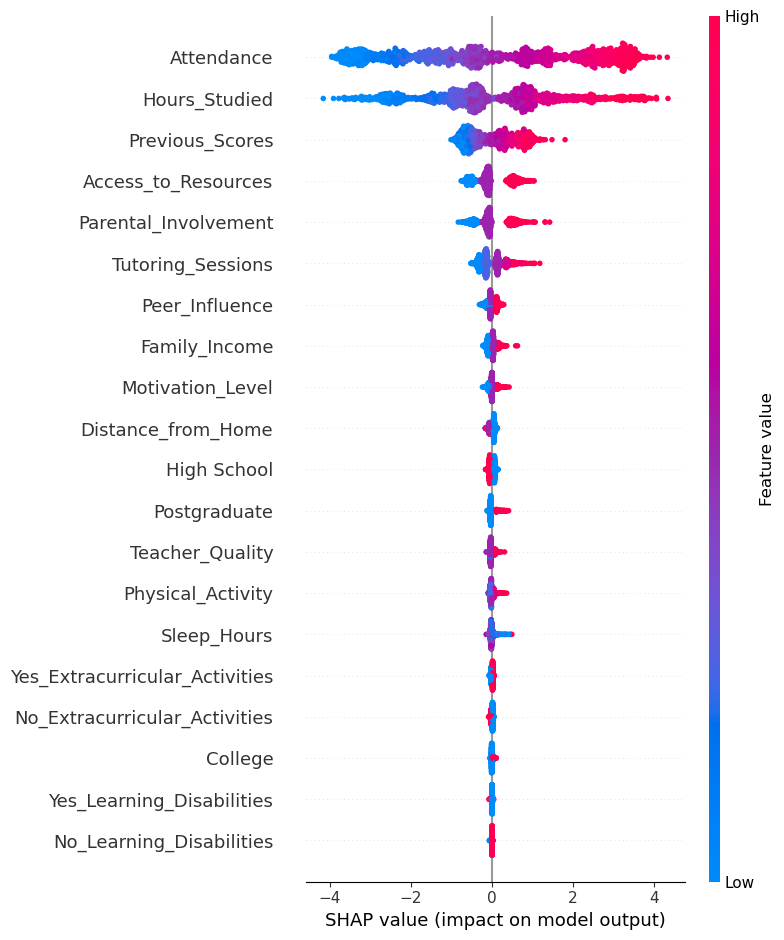

In [145]:
# SHAP for Random Forest
explainer = shap.TreeExplainer(Random_Forest_Best_Model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)

In [149]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], X_test.iloc[0], feature_names=X_test_scaled.columns)

In [151]:
y_pred_best_random_forest = Random_Forest_Best_Model.predict(X_test)
y_pred_best_random_forest

array([64.52140693, 66.28760549, 69.85441951, ..., 65.80849402,
       66.12766752, 71.17733848])

In [153]:

random_forest_mse = mean_squared_error(y_test, y_pred_best_random_forest)
random_forest_mape = mean_absolute_percentage_error(y_test, y_pred_best_random_forest)

print(f"Random Forest MSE: {random_forest_mse}")
print(f"Random Forest MAPE: {random_forest_mape}")

Random Forest MSE: 4.500309507001315
Random Forest MAPE: 0.015761786880276255


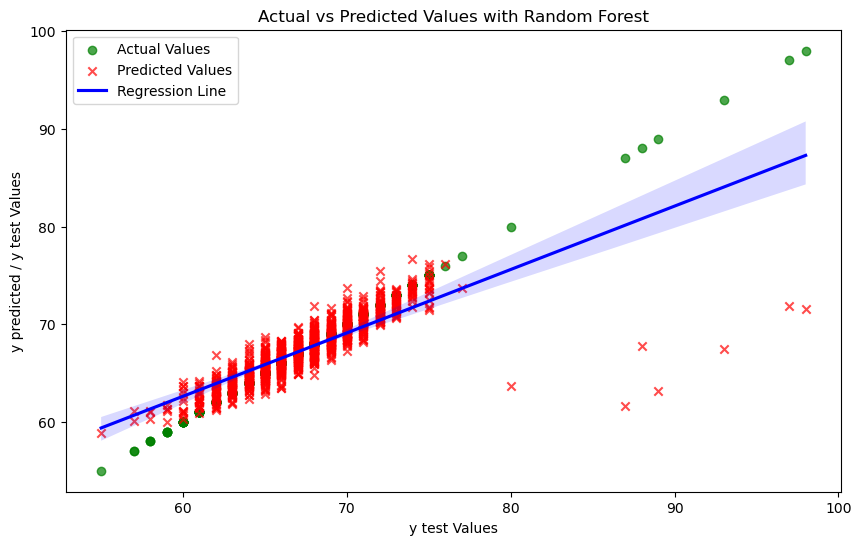

In [155]:
plt.figure(figsize = (10, 6))

# Scatter plot for actual values
plt.scatter(y_test, y_test, color = 'green', alpha = 0.7, label = 'Actual Values', marker = 'o')

# Scatter plot for predicted values
plt.scatter(y_test, y_pred_best_random_forest, color = 'red', alpha = 0.7, label = 'Predicted Values', marker = 'x')

# Regression line (fit for predicted values)
sns.regplot(x = y_test, y = y_pred_best_random_forest, scatter = False, color = 'blue', label = 'Regression Line')

# Plot enhancements
plt.xlabel('y test Values')
plt.ylabel('y predicted / y test Values')
plt.title('Actual vs Predicted Values with Random Forest')
plt.legend()
plt.show()

# Random Forest Results:

### Random Forest MSE: 4.500309507001315
### Random Forest MAPE: 0.015761786880276255

# Artifical Nueral Network

In [160]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import utils
from tensorflow.keras.optimizers import Adam

In [161]:
tf.random.set_seed(69)

In [162]:
ANN_Model = Sequential()

In [163]:
# Input Layer
ANN_Model.add(Dense(units = len(X_train_scaled.columns), activation = 'relu', input_shape = [len(X_train_scaled.columns), ]))

# Hidden Layer
ANN_Model.add(Dense(units = 26, activation = 'relu'))

ANN_Model.add(Dense(units = 52, activation = 'relu'))

ANN_Model.add(Dense(units = 104, activation = 'relu'))

ANN_Model.add(Dense(units = 52, activation = 'relu'))

ANN_Model.add(Dense(units = 26, activation = 'relu'))

# Output Layer
ANN_Model.add(Dense(units = 1))

In [164]:
# Compiling
X_train_scaled, X_val_scaled, y_train_scaled, y_val_scaled = train_test_split(X_train_scaled, y_train_scaled, test_size = 0.2, random_state = 42)

ANN_Model.compile(optimizer = Adam(0.01), loss = 'mean_squared_error', metrics = ['mape'])

ANN_Model.fit(X_train_scaled, y_train_scaled, epochs = 500, verbose = 2, validation_data = (X_val_scaled, y_val_scaled))

Epoch 1/500
133/133 - 3s - 22ms/step - loss: 0.4157 - mape: 80.9765 - val_loss: 0.3847 - val_mape: 94.7377
Epoch 2/500
133/133 - 0s - 2ms/step - loss: 0.3577 - mape: 66.7902 - val_loss: 0.4004 - val_mape: 88.0879
Epoch 3/500
133/133 - 0s - 1ms/step - loss: 0.3574 - mape: 66.0007 - val_loss: 0.2963 - val_mape: 51.0510
Epoch 4/500
133/133 - 0s - 1ms/step - loss: 0.3508 - mape: 60.8086 - val_loss: 0.2922 - val_mape: 44.9226
Epoch 5/500
133/133 - 0s - 1ms/step - loss: 0.3333 - mape: 57.2226 - val_loss: 0.2878 - val_mape: 42.8419
Epoch 6/500
133/133 - 0s - 1ms/step - loss: 0.3260 - mape: 55.6150 - val_loss: 0.2942 - val_mape: 42.1927
Epoch 7/500
133/133 - 0s - 1ms/step - loss: 0.3419 - mape: 61.2373 - val_loss: 0.2956 - val_mape: 41.9496
Epoch 8/500
133/133 - 0s - 1ms/step - loss: 0.3454 - mape: 58.8010 - val_loss: 0.3304 - val_mape: 39.5953
Epoch 9/500
133/133 - 0s - 1ms/step - loss: 0.3349 - mape: 59.8557 - val_loss: 0.4013 - val_mape: 110.0365
Epoch 10/500
133/133 - 0s - 1ms/step - loss:

SHAP Waterfall Plot for ANN - First Test Instance


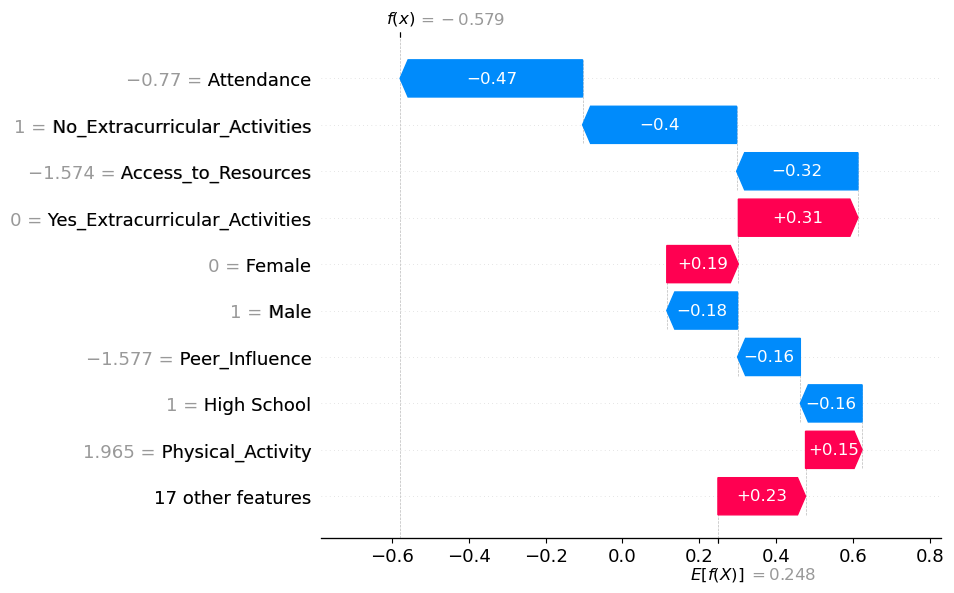

In [180]:
# Convert data to numpy arrays
X_train_np = X_train_scaled.to_numpy()
X_test_np = X_test_scaled.to_numpy()

# SHAP DeepExplainer: Use a smaller subset for efficiency
explainer = shap.DeepExplainer(ANN_Model, X_train_np[:100])
shap_values = explainer.shap_values(X_test_np[:50])

# Extract SHAP values for the first test instance and flatten
single_shap_value = np.squeeze(shap_values[0])  # SHAP values for the first instance

# Convert base_value to scalar (ensure it is a float)
base_value = float(np.array(explainer.expected_value))  

# SHAP Waterfall Plot for the first test instance
print("SHAP Waterfall Plot for ANN - First Test Instance")
shap.waterfall_plot(shap.Explanation(
    values=single_shap_value,           # SHAP values for first instance
    base_values=base_value,             # Base value (scalar)
    data=X_test_np[0],                  # Feature values for the first instance
    feature_names=X_test_scaled.columns.tolist()  # Feature names
))

In [182]:
y_pred_ANN = ANN_Model.predict(X_test_scaled)
y_pred_ANN

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[-0.57850313],
       [-0.42902994],
       [ 1.0609097 ],
       ...,
       [-0.04619789],
       [-0.8946786 ],
       [ 6.7516847 ]], dtype=float32)

In [184]:
mse_ANN_Model = mean_squared_error(y_test_scaled, y_pred_ANN)

mape_ANN_Model = mean_absolute_percentage_error(y_test_scaled, y_pred_ANN)

print(f"ANN MSE: {mse_ANN_Model}")
print(f"ANN MAPE: {mape_ANN_Model}")

ANN MSE: 0.28707651599324785
ANN MAPE: 0.4196624248574527


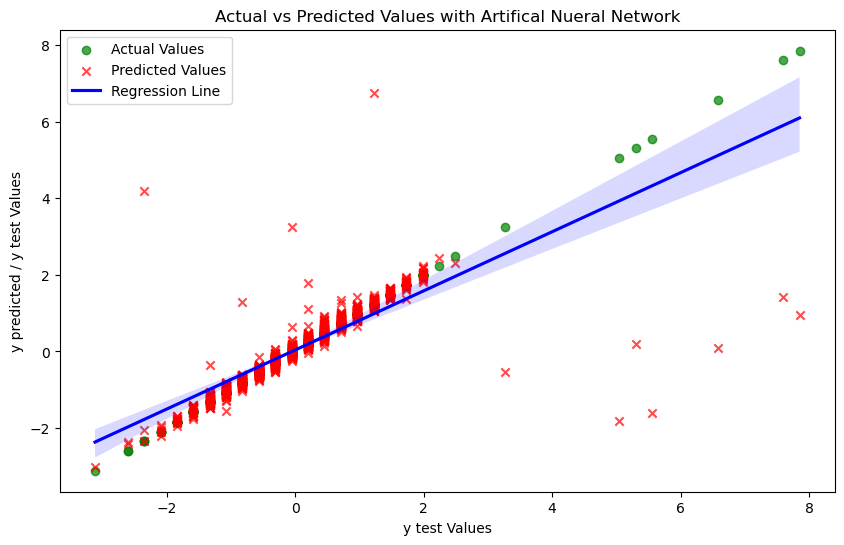

In [186]:
plt.figure(figsize = (10, 6))

# Scatter plot for actual values
plt.scatter(y_test_scaled, y_test_scaled, color = 'green', alpha = 0.7, label = 'Actual Values', marker = 'o')

# Scatter plot for predicted values
plt.scatter(y_test_scaled, y_pred_ANN, color = 'red', alpha = 0.7, label = 'Predicted Values', marker = 'x')

# Regression line (fit for predicted values)
sns.regplot(x = y_test_scaled, y = y_pred_ANN, scatter = False, color = 'blue', label = 'Regression Line')

# Plot enhancements
plt.xlabel('y test Values')
plt.ylabel('y predicted / y test Values')
plt.title('Actual vs Predicted Values with Artifical Nueral Network')
plt.legend()
plt.show()


# ANN Results: 

### ANN MSE: 0.2766594521565666
### ANN MAPE: 0.4173717709400492

# Key Observations:

## Artificial Neural Network (ANN):

1. MSE: 0.2767 (lowest among all models).
2. MAPE: 0.4174 (relatively high compared to others).
3. ANN excels in reducing MSE, which means it's good at minimizing large errors. However, its higher MAPE suggests the model might struggle with proportional accuracy, especially on smaller target values.

## Random Forest:

1. MSE: 4.5003 (higher than linear models).
2. MAPE: 0.0158 (lowest among all models).
3. While Random Forest offers excellent proportional accuracy (MAPE), the MSE is substantially worse than ANN or linear models. This indicates that Random Forest struggles with capturing the target's scale.

## Ridge, and Linear Regression:

1. MSE: ~3.236–3.239 (moderate, consistent across these models).
2. MAPE: ~0.0062 (excellent proportional accuracy).
3. These models have very similar performance. They balance both MSE and MAPE effectively but don't match ANN's performance on overall error (MSE).

# Choosing the Best Model

- Since our primary goal is to minimize MAPE, we would proceed with Lasso, Ridge, or Linear Regression, as these models provide the best results in terms of proportional accuracy.

- However, if our use case prioritized "minimizing larger errors" (MSE), we would have chosen ANN, as it delivers the lowest MSE among all models.